# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -O face_emotion.zip "https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290" facemask


--2021-12-06 05:59:43--  https://filesender.renater.fr/download.php?token=1399b9ee-9f53-4f8a-b921-d212325f06a4&files_ids=10167290
Resolving filesender.renater.fr (filesender.renater.fr)... 194.57.3.10
Connecting to filesender.renater.fr (filesender.renater.fr)|194.57.3.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80330117 (77M) [application/zip]
Saving to: ‘face_emotion.zip’

face_emotion.zip    100%[===================>]  76.61M   478KB/s    in 2m 47s  

2021-12-06 06:02:31 (470 KB/s) - ‘face_emotion.zip’ saved [80330117/80330117]

--2021-12-06 06:02:31--  http://facemask/
Resolving facemask (facemask)... failed: Name or service not known.
wget: unable to resolve host address ‘facemask’
FINISHED --2021-12-06 06:02:31--
Total wall clock time: 2m 48s
Downloaded: 1 files, 77M in 2m 47s (470 KB/s)


In [ ]:
!unzip -q face_emotion.zip -d image_emotion

In [ ]:
picture_size = 48

Loading the data to numpy arrays

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
dataset_Foldre="image_emotion/image_emotion/train"
dataset_Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)   

data_train = np.array(data, dtype="float32")
labels_train = np.array(labels)
dataset_Foldre="image_emotion/image_emotion/test"
data = []
labels = []
for folder in dataset_Classes:
    path = os.path.join(dataset_Foldre,folder)
    category_num = dataset_Classes.index(folder)
    for image_name in os.listdir(path):
        image_path = os.path.join(path,image_name)
        image = load_img(image_path, target_size=(picture_size, picture_size),color_mode="grayscale")
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category_num)        

data_test = np.array(data, dtype="float32")
labels_test = np.array(labels)

# Data analysis

In [ ]:
print("The size of the training data is X={} Y={} ".format(data_train.shape, labels_train.shape[0]))
print("The size of the test data is X={} Y={} ".format(data_test.shape, labels_test.shape[0]))

The size of the training data is X=(28709, 48, 48, 1) Y=28709 
The size of the test data is X=(7178, 48, 48, 1) Y=7178 


Splitting the test data into test/validation sets

In [ ]:
test = [(x,y) for x,y in zip(labels_test, data_test)]
from random import  shuffle
shuffle(test)

In [ ]:
labels_test = [x[0] for x in test]
data_test = [x[1] for x in test]
data_test = np.array(data_test, dtype="float32")
labels_test = np.array(labels_test)
#splitting the test set into test/validation sets
data_val = data_test[:7178//2]
labels_val = labels_test[:7178//2]
data_test = data_test[7178//2:]
labels_test = labels_test[7178//2:]
print("The size of the test data is X={} Y={} ".format(data_test.shape, labels_test.shape[0]))
print("The size of the validation data is X={} Y={} ".format(data_val.shape, labels_val.shape[0]))

The size of the test data is X=(3589, 48, 48, 1) Y=3589 
The size of the validation data is X=(3589, 48, 48, 1) Y=3589 


Visualization of the distribution of the emotions in the training data

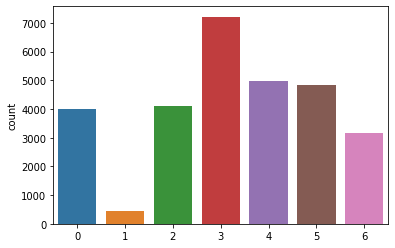

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=labels_train)

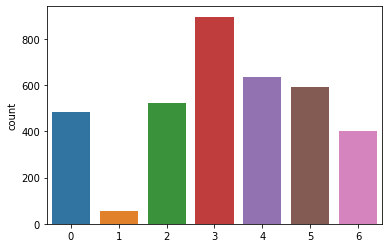

In [ ]:
sns.countplot(x=labels_val)

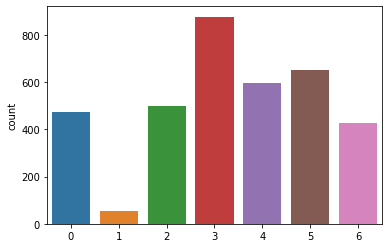

In [ ]:
sns.countplot(x=labels_test)

# Model training and development

Starting with a small NN to see how it performs on the data

In [ ]:
batch_size = 128
data_size = data_train.shape[0]
model0 = Sequential()
model0.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model0.add(MaxPooling2D((2, 2)))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D((2, 2)))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D((2, 2)))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D((2, 2)))
model0.add(Flatten())
model0.add(Dense(64, activation='relu'))
model0.add(Flatten())
model0.add(Dense(64, activation='relu'))
model0.add(Dense(7, activation='softmax'))
model0.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history0 = model0.fit(data_train, labels_train,shuffle=True, validation_data=(data_val, labels_val), epochs=20, batch_size=batch_size)

Epoch 1/20
225/225 [==============================] - 87s 383ms/step - loss: 1.7355 - accuracy: 0.2911 - val_loss: 1.5758 - val_accuracy: 0.3792
Epoch 2/20
225/225 [==============================] - 85s 380ms/step - loss: 1.4785 - accuracy: 0.4235 - val_loss: 1.4048 - val_accuracy: 0.4533
Epoch 3/20
225/225 [==============================] - 84s 375ms/step - loss: 1.3379 - accuracy: 0.4911 - val_loss: 1.3449 - val_accuracy: 0.4843
Epoch 4/20
225/225 [==============================] - 85s 378ms/step - loss: 1.2519 - accuracy: 0.5243 - val_loss: 1.3076 - val_accuracy: 0.4962
Epoch 5/20
225/225 [==============================] - 85s 376ms/step - loss: 1.1840 - accuracy: 0.5540 - val_loss: 1.2555 - val_accuracy: 0.5185
Epoch 6/20
225/225 [==============================] - 85s 377ms/step - loss: 1.1296 - accuracy: 0.5700 - val_loss: 1.2280 - val_accuracy: 0.5288
Epoch 7/20
225/225 [==============================] - 84s 374ms/step - loss: 1.0820 - accuracy: 0.5914 - val_loss: 1.2037 - val_ac

Now adding more layers, normalization, early_stopping to get better results

In [ ]:
from keras import models, regularizers
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import Sequential

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import pandas as pd

checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', 
                          min_delta=0,
                          patience=7,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


In [ ]:
def model_define(filtre,drop_out,drop_out2,act_func):
  model = Sequential()

  model.add(Conv2D(filtre,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Conv2D(filtre,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(drop_out))

  model.add(Conv2D(3*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Conv2D(3*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(drop_out))

  model.add(Conv2D(6*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Conv2D(6*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(drop_out))


  model.add(Conv2D(6*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Conv2D(6*filtre,(3,3),padding='same',kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(drop_out))


  model.add(Flatten())
  model.add(Dense(64,kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Dropout(drop_out2))


  model.add(Dense(64,kernel_initializer='he_normal'))
  model.add(Activation(act_func))
  model.add(BatchNormalization())
  model.add(Dropout(drop_out2))


  model.add(Dense(7,kernel_initializer='he_normal'))
  model.add(Activation('softmax'))
  return model

In [ ]:
drop_out = [0.1,0.2] 
drop_out2 = [0.2,0.5] 
act_func = ['relu','elu','tanh','sigmoid','softmax']
filtre = [8,10,16,20,32,64] 
results = pd.DataFrame(columns=["drop_out_1", "drop_out_2", "activation_func", "filters", "train_accuracy", "train_loss", "validation_accuracy", "validation_loss"])

In [ ]:
#use try catch here fo smoother execution
try:
  save_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M2_AI/AAP/project/results.csv')
except FileNotFoundError:
  results.to_csv('/content/drive/MyDrive/Colab Notebooks/M2_AI/AAP/project/results.csv', index=False)

In [ ]:
for drop_out_1 in drop_out:
  for drop_out_2 in drop_out2:
    for act_func_1 in act_func:
      for filtre1 in filtre:
        model = model_define(filtre1,drop_out_1,drop_out_2,act_func_1)
        model.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(data_train, labels_train,shuffle=True,
                    validation_data=(data_val, labels_val),
                    epochs=50,
                    batch_size=64,callbacks=callbacks_list)
        results.loc[results.shape[0]] = [drop_out_1, drop_out_2, act_func_1, filtre1, history.history["accuracy"][-1], history.history["loss"][-1], history.history["val_accuracy"][-1], history.history["val_loss"][-1]]
        save_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M2_AI/AAP/project/results.csv')
        save_file.loc[save_file.shape[0]] = results.iloc[-1]
        save_file.to_csv('/content/drive/MyDrive/Colab Notebooks/M2_AI/AAP/project/results.csv', index=False)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
449/449 [==============================] - 940s 2s/step - loss: 1.9083 - accuracy: 0.2930 - val_loss: 1.6261 - val_accuracy: 0.3689 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - 944s 2s/step - loss: 1.4953 - accuracy: 0.4252 - val_loss: 1.3484 - val_accuracy: 0.4795 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - 948s 2s/step - loss: 1.3276 - accuracy: 0.4962 - val_loss: 1.2191 - val_accuracy: 0.5339 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - 880s 2s/step - loss: 1.2289 - accuracy: 0.5347 - val_loss: 1.1759 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 5/50
449/449 [==============================] - 878s 2s/step - loss: 1.1588 - accuracy: 0.5617 - val_loss: 1.1364 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 6/50
449/449 [==============================] - 878s 2s/step - loss: 1.1019 - accuracy: 0.5870 - val_loss: 1.0790 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 7/50
449/449 [==============================] - 878s 2s/st

Visualisation of the model evolution 

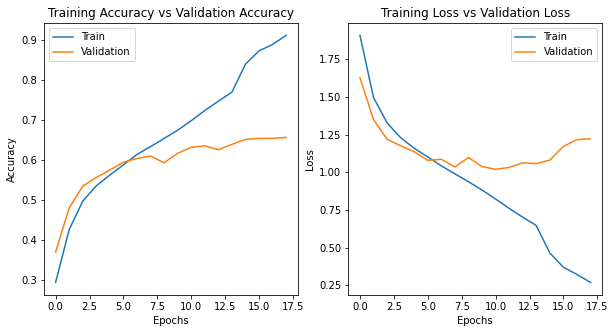

In [ ]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(10,5)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='best')

plt.show()

Using image data generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [ ]:
model_aug = model_define(32,0.2,0.2,'relu')
model_aug.compile(optimizer=Adam(lr=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_aug = model_aug.fit(aug.flow(data_train, labels_train, batch_size=64),shuffle=True, validation_data=(data_val, labels_val), epochs=50, batch_size=64,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
449/449 [==============================] - 915s 2s/step - loss: 2.0014 - accuracy: 0.2250 - val_loss: 1.7420 - val_accuracy: 0.2923 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - 917s 2s/step - loss: 1.7810 - accuracy: 0.2843 - val_loss: 1.6088 - val_accuracy: 0.3664 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - 925s 2s/step - loss: 1.6277 - accuracy: 0.3591 - val_loss: 1.5187 - val_accuracy: 0.4274 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - 941s 2s/step - loss: 1.4752 - accuracy: 0.4304 - val_loss: 1.3724 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 5/50
449/449 [==============================] - 990s 2s/step - loss: 1.3762 - accuracy: 0.4753 - val_loss: 1.3062 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 6/50
449/449 [==============================] - 1046s 2s/step - loss: 1.3046 - accuracy: 0.5080 - val_loss: 1.2456 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 7/50
449/449 [==============================] - 959s 2s/s

Saving the model

In [ ]:
model.save('emotion_detection.h5')
model.save_weights('model_weights.h5')
np.save("history", history.history)